<a href="https://colab.research.google.com/github/JibKh/NVIDIA-FlowNet2-Google-Colab/blob/master/FlowNet2_Colab_Incomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Install FlowNet2

In [2]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Sat Oct 17 13:47:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+

In [3]:
!pip install torch==1.0.0 torchvision==0.2.2 -f https://download.pytorch.org/whl/cu100/torch_stable.html
!pip install pypng
!pip install tensorboardx
!pip install setproctitle colorama scipy==1.1.0
!pip install flowiz -U

Looking in links: https://download.pytorch.org/whl/cu100/torch_stable.html
     |████████████████████████████████| 591.8MB 30kB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.19.9 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.19.9 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 655kB 7.9MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67162 sha256=da5383e2

In [4]:
import os
# get flownet2-pytorch source
!git clone https://github.com/NVIDIA/flownet2-pytorch.git
!mv /content/flownet2-pytorch /content/flownet2pytorch
os.chdir('./flownet2pytorch')
# install custom layers
!bash install.sh

Cloning into 'flownet2-pytorch'...
remote: Enumerating objects: 557, done.
remote: Total 557 (delta 0), reused 0 (delta 0), pack-reused 557
Receiving objects: 100% (557/557), 6.28 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (312/312), done.
running install
running bdist_egg
running egg_info
creating correlation_cuda.egg-info
writing correlation_cuda.egg-info/PKG-INFO
writing dependency_links to correlation_cuda.egg-info/dependency_links.txt
writing top-level names to correlation_cuda.egg-info/top_level.txt
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
building 'correlation_cuda' extension
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/p

In [5]:
import os
os.sys.path.append('/root/.local/lib/python3.6/site-packages/resample2d_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append('/root/.local/lib/python3.6/site-packages/correlation_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append( '/root/.local/lib/python3.6/site-packages/channelnorm_cuda-0.0.0-py3.6-linux-x86_64.egg')

In [6]:
!python main.py --help

usage: main.py [-h] [--start_epoch START_EPOCH] [--total_epochs TOTAL_EPOCHS]
               [--batch_size BATCH_SIZE] [--train_n_batches TRAIN_N_BATCHES]
               [--crop_size CROP_SIZE [CROP_SIZE ...]]
               [--gradient_clip GRADIENT_CLIP]
               [--schedule_lr_frequency SCHEDULE_LR_FREQUENCY]
               [--schedule_lr_fraction SCHEDULE_LR_FRACTION]
               [--rgb_max RGB_MAX] [--number_workers NUMBER_WORKERS]
               [--number_gpus NUMBER_GPUS] [--no_cuda] [--seed SEED]
               [--name NAME] [--save SAVE]
               [--validation_frequency VALIDATION_FREQUENCY]
               [--validation_n_batches VALIDATION_N_BATCHES]
               [--render_validation] [--inference] [--inference_visualize]
               [--inference_size INFERENCE_SIZE [INFERENCE_SIZE ...]]
               [--inference_batch_size INFERENCE_BATCH_SIZE]
               [--inference_n_batches INFERENCE_N_BATCHES] [--save_flow]
               [--resume PATH] [--log

# User Input and Restart

In [111]:
# FOR INFERENCE
video_frames = 2 # If you have a video put 1. If you have frames put 2.

frames_zip_name = "1 - Video_Export.zip" # If you have the frames, enter its zip file here. For ex: "3 - Video.zip"
frames_directory = '../gdrive/My Drive/Hajj Videos/Frames/' # Where the frames are located. If its in gdrive: '../gdrive/My Drive/Location of Zip/' Change the Location of Zip to wherever yours is stored.
no_frames_skip = None # How many frames you want skipped. This works in modulus manner. If you input 1, all the frames are skipped. 3 means every third frame is skipped etc. Leave at None to not skip frames.
no_average_frames = 4 # How many frames you want to average.
flow_video_name = frames_zip_name[0:-4] + '.mp4'

video_name = None # If you have a video you want to run inference on. Please include .mp4 or whatever extension the video has.
video_local_gdrive = None # If you want to upload a video from your local drive, choose 1. If from your google drive, choose 2. If some other option, go to section "Upload Video".
video_gdrive = None # File_id for your google drive video. Use this link to see how to get file ID https://docs.meiro.io/books/meiro-integrations/page/where-can-i-find-the-file-id-on-google-drive#:~:text=To%20locate%20the%20File%20ID,%3D%60%20is%20the%20File%20ID.

In [112]:
# If you are using Google Drive to access frames, mount it here. The first time you run it, it will give you a prompt.
if video_frames == 2:
  from google.colab import drive
  drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [113]:
# If you are uploading a video from your local machine, please do so here.
if video_frames == 1 and video_local_gdrive == 1:
  from google.colab import files
  uploaded = files.upload()
  if video_name != list(uploaded.keys())[0]:
    video_name = list(uploaded.keys())[0]

In [114]:
# To restart and run again. Change any parameters above and then go click the "User Input and Restart" cell. Then Runtime -> Run After.
!rm -r ./frames
!rm -r ./Flo
!rm -r ./FlowFrames
!rm -r ./output
!rm ./$video_name
!rm -r ./FlowVideo
!rm -r ./Backup
!pip install setproctitle colorama scipy==1.1.0

rm: cannot remove './None': No such file or directory
rm: cannot remove './FlowVideo': No such file or directory
rm: cannot remove './Backup': No such file or directory
  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


# Training and Validation - Not tested

If you do not want to train your model, you can skip this and move on to inference.

The dataset my team used is quite large and we have unlimited storage on OneDrive. So we have mounted OneDrive to read and write data to. <br>
To understand how to use it: https://www.youtube.com/watch?v=U6YPgARhRzA&t=255s&ab_channel=BoostUpStation

## OneDrive

In [115]:
# !wget https://downloads.rclone.org/v1.50.1/rclone-v1.50.1-linux-amd64.deb
# !apt install ./rclone-v1.50.1-linux-amd64.deb

In [116]:
# !rclone config

In [117]:
# !sudo mkdir /content/onedrive
# !nohup rclone --vfs-cache-mode writes mount onedrive: /content/onedrive &

## Train and Validate

In [118]:
# !python main.py --batch_size 8 --model FlowNet2 --loss=L1Loss --optimizer=Adam --optimizer_lr=1e-4 \
# --training_dataset MpiSintelFinal --training_dataset_root /path/to/mpi-sintel/final/dataset  \
# --validation_dataset MpiSintelClean --validation_dataset_root /path/to/mpi-sintel/clean/dataset

# Run the inference

## Setup Video

### Upload Video

1) Upload your own video from Google Drive. <br>
2) Upload a video from your local machine. They will be saved in flownet2pytorch folder.

In [119]:
# Download from Google drive
if video_frames == 1 and video_local_gdrive == 2:
  from google_drive_downloader import GoogleDriveDownloader as gdd
  gdd.download_file_from_google_drive(file_id=video_gdrive, dest_path=video_name)

In [120]:
# # Or upload from local machine
# if video_frames == 1 and video_local_gdrive == 1:
#   from google.colab import files
#   uploaded = files.upload()
#   if video_name != list(uploaded.keys())[0]:
#     video_name = list(uploaded.keys())[0]

### Converting video to frames

In [121]:
if video_frames == 1:
  import os
  def mkdir_ifnotexists(dir):
      if os.path.exists(dir):
          return
      os.mkdir(dir)

In [122]:
if video_frames == 1:
  vid_file = video_name
  frame_pth = './frames'
  mkdir_ifnotexists(frame_pth)
  cmd = "ffmpeg -i %s -start_number 0 -vsync 0 %s/frame_%%06d.png" % (
              vid_file,
              frame_pth,
          )
  os.system(cmd)

## Setup Frames

### Download Frames

In [123]:
# if video_frames == 2:
#   !mkdir -p ./frames

#   from google.colab import drive
#   drive.mount('/content/gdrive')

In [124]:
if video_frames == 2:
  !mkdir -p ./frames
  unzip_file = frames_directory + frames_zip_name
  !unzip '$unzip_file' -d ./frames

Archive:  ../gdrive/My Drive/Hajj Videos/Frames/1 - Video_Export.zip
mapname:  conversion of  failed
 extracting: ./frames/20180820231746378_UTC+01.jpg  
 extracting: ./frames/20180820231829711_UTC+01.jpg  
 extracting: ./frames/20180820231835045_UTC+01.jpg  
 extracting: ./frames/20180820232010247_UTC+01.jpg  
 extracting: ./frames/20180820231919045_UTC+01.jpg  
 extracting: ./frames/20180820232012113_UTC+01.jpg  
 extracting: ./frames/20180820231839111_UTC+01.jpg  
 extracting: ./frames/20180820231758379_UTC+01.jpg  
 extracting: ./frames/20180820231909777_UTC+01.jpg  
 extracting: ./frames/20180820231949847_UTC+01.jpg  
 extracting: ./frames/20180820231843044_UTC+01.jpg  
 extracting: ./frames/20180820231842044_UTC+01.jpg  
 extracting: ./frames/20180820231938246_UTC+01.jpg  
 extracting: ./frames/20180820231802313_UTC+01.jpg  
 extracting: ./frames/20180820231823579_UTC+01.jpg  
 extracting: ./frames/20180820231800113_UTC+01.jpg  
 extracting: ./frames/20180820231913377_UTC+01.jpg 

### Rename Frames

In [125]:
!ls ./frames | wc -l # Use to recheck if number of frames is consistent and nothing went wrong.

2262


In [126]:
if video_frames == 2:
  import os

  file_dir = "./frames/"
  for count, filename in enumerate(sorted(os.listdir(file_dir))):
    # print(filename)
    if filename[-11:] == "_UTC+01.jpg":
      src = file_dir + filename
      dst = file_dir + str(count).zfill(6) + '.png'
      os.rename(src, dst)

In [127]:
!ls ./frames | wc -l # Use to recheck if number of frames is consistent and nothing went wrong.

2262


### Skip Frames

In [128]:
!ls ./frames | wc -l # Use to recheck if number of frames is consistent and nothing went wrong.

2262


In [129]:
if no_frames_skip != None:
  directory = './frames'
  # no_frames_skip = 2

  for i, file in enumerate(sorted(os.listdir(directory))):
    if (file[-4:] == ".png") and (int(file[0:-4]) % no_frames_skip == 0):
      # print(file)
      os.remove(directory+'/' + file)

In [130]:
if no_frames_skip != None:
  import os

  file_dir = "./frames/"
  for count, filename in enumerate(sorted(os.listdir(file_dir))):
    # print(filename)
    if filename[-4:] == ".png":
      src = file_dir + filename
      dst = file_dir + str(count).zfill(6) + '.png'
      os.rename(src, dst)

In [131]:
!ls ./frames | wc -l # Use to recheck if number of frames is consistent and nothing went wrong.

2262


## Run Inference

Download the checkpoint. <br>
If you have your own checkpoint after training, skip this step.

In [132]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da',dest_path='./FlowNet2_checkpoint.pth.tar')

Run inference. <br>
You can learn more about each command from here: https://towardsdatascience.com/generating-optical-flow-using-nvidia-flownet2-pytorch-implementation-d7b0ae6f8320

In [133]:
!python main.py --inference --model FlowNet2 --save_flow --save ./output --inference_dataset ImagesFromFolder --inference_dataset_root ./frames/ --resume ./FlowNet2_checkpoint.pth.tar

Streaming output truncated to the last 5000 lines.
Inference Averages for Epoch 0: L1: 0.108, EPE: 0.186:  26%|▊  | 596/2261.0 [08:12<23:33,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.186:  26%|▊  | 596/2261.0 [08:13<23:33,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.186:  26%|▊  | 597/2261.0 [08:13<23:27,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.186:  26%|▊  | 597/2261.0 [08:13<23:27,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.186:  26%|▊  | 597/2261.0 [08:14<23:27,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.186:  26%|▊  | 598/2261.0 [08:14<23:24,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.186:  26%|▊  | 598/2261.0 [08:14<23:24,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.185:  26%|▊  | 598/2261.0 [08:15<23:24,  1.18it/s]
Inference Averages for Epoch 0: L1: 0.107, EPE: 0.185:  26%|▊  | 599/2261.0 [08:15<23:19,  1.19it/s]
Inference Averages for Epoch 0: L1: 0.10

# Testing Average

In [134]:
import numpy as np
from pathlib import Path
import os
from utils.flow_utils import writeFlow

def write_frame(flow, i):
  dir = "./Flo/" + str(i).zfill(6) + ".flo"
  writeFlow(dir, flow)

def average_list(list1):
  length_list = len(list1)
  temp_addition = 0
  for i in range(0, length_list):
      temp_addition += list1[i]
  temp_val = temp_addition / length_list
  return temp_val
  # try:
  #   return (list1[0] + list1[1]) / 2
  # except:
  #   print("Error in averaging")

flow_list = [None] * no_average_frames
index_flow = 0
index_name = 0

!mkdir ./Flo
dir = './output/inference/run.epoch-0-flow-field/'

for i, flo_file in enumerate(sorted(os.listdir(dir))):
  if flo_file[-3:] != "flo":
    continue

  path = Path(dir + flo_file)
  with path.open(mode='r') as flo:
    tag = np.fromfile(flo, np.float32, count=1)[0]
    width = np.fromfile(flo, np.int32, count=1)[0]
    height = np.fromfile(flo, np.int32, count=1)[0]
    nbands = 2
    tmp = np.fromfile(flo, np.float32, count= nbands * width * height)
    flow = np.resize(tmp, (int(height), int(width), int(nbands)))

    # Method 1
    # if i == 0:
    #   flow_list[0] = flow
    # else:
    #   flow_list[1] = flow
    #   average_flow = average_list(flow_list)
    #   write_frame(average_flow, i-1)
    #   flow_list[0] = average_flow

    # Method 2
    # if index_flow == 0:
    #   flow_list[index_flow] = flow
    #   index_flow += 1
    # else:
    #   flow_list[index_flow] = flow
    #   index_flow = 0
    #   average_flow = average_list(flow_list)
    #   write_frame(average_flow, index_name)
    #   index_name += 1

    # Method 3
    if (index_flow % no_average_frames == 0) and index_flow != 0:
      average_flow = average_list(flow_list)
      write_frame(average_flow, index_name)
      index_flow = 0
      index_name += 1

    flow_list[index_flow] = flow
    index_flow += 1

    if i == len(os.listdir(dir)) - 1:
      average_flow = average_list(flow_list)
      write_frame(average_flow, index_name)

    os.remove(dir + flo_file)

yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
y

In [135]:
!ls ./Flo | wc -l # Use to recheck if number of frames is consistent and nothing went wrong.
# !rm -r ./Flo

565


In [136]:
# !mkdir ./Flo

# from utils.flow_utils import writeFlow

# for i in range(0, len(new_flows)):
#   dir = "./Flo/" + str(i).zfill(6) + ".flo"
#   writeFlow(dir, new_flows[i])

# Flowiz technique

In [137]:
# !python -m flowiz \
# ./Flo/*.flo \
# -o FlowFrames \
# -v FlowVideo \
# -r 15

# !mv ./FlowVideo/000000.flo.mp4 './FlowVideo/$flow_video_name'

In [138]:
# from google.colab import files
# files.download('./FlowVideo/'+flow_video_name)

# Visualizing flo files

### Install scipy as some tensorflow functionality requires updated scipy

In [139]:
import time

start_time = time.time()

!pip install scipy==1.4.1

  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


### Define show_flow() for visualization.
 Original Source https://github.com/sampepose/flownet2-tf/blob/master/src/flowlib.py

In [140]:
# Source:https://github.com/sampepose/flownet2-tf/blob/master/src/flowlib.py
import matplotlib.pyplot as plt
import numpy as np

UNKNOWN_FLOW_THRESH = 1e7
def show_flow(filename):
    """
    visualize optical flow map using matplotlib
    :param filename: optical flow file
    :return: None
    """
    flow = read_flow(filename)
    img = flow_to_image(flow)
    plt.imshow(img)
    plt.show()

def read_flow(filename):
    """
    read optical flow from Middlebury .flo file
    :param filename: name of the flow file
    :return: optical flow data in matrix
    """
    f = open(filename, 'rb')
    magic = np.fromfile(f, np.float32, count=1)
    data2d = None

    if 202021.25 != magic:
        print ('Magic number incorrect. Invalid .flo file')
    else:
        w = int(np.fromfile(f, np.int32, count=1)[0])
        h = int(np.fromfile(f, np.int32, count=1)[0])
        #print("Reading %d x %d flo file" % (h, w))
        data2d = np.fromfile(f, np.float32, count=2 * w * h)
        # reshape data into 3D array (columns, rows, channels)
        data2d = np.resize(data2d, (h, w, 2))
    f.close()
    return data2d

def flow_to_image(flow):
    """
    Convert flow into middlebury color code image
    :param flow: optical flow map
    :return: optical flow image in middlebury color
    """
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    maxu = -999.
    maxv = -999.
    minu = 999.
    minv = 999.

    idxUnknow = (abs(u) > UNKNOWN_FLOW_THRESH) | (abs(v) > UNKNOWN_FLOW_THRESH)
    u[idxUnknow] = 0
    v[idxUnknow] = 0

    maxu = max(maxu, np.max(u))
    minu = min(minu, np.min(u))

    maxv = max(maxv, np.max(v))
    minv = min(minv, np.min(v))

    rad = np.sqrt(u ** 2 + v ** 2)
    maxrad = max(-1, np.max(rad))

    #print( "max flow: %.4f\nflow range:\nu = %.3f .. %.3f\nv = %.3f .. %.3f" % (maxrad, minu,maxu, minv, maxv))

    u = u/(maxrad + np.finfo(float).eps)
    v = v/(maxrad + np.finfo(float).eps)

    img = compute_color(u, v)

    idx = np.repeat(idxUnknow[:, :, np.newaxis], 3, axis=2)
    img[idx] = 0

    return np.uint8(img)


def compute_color(u, v):
    """
    compute optical flow color map
    :param u: optical flow horizontal map
    :param v: optical flow vertical map
    :return: optical flow in color code
    """
    [h, w] = u.shape
    img = np.zeros([h, w, 3])
    nanIdx = np.isnan(u) | np.isnan(v)
    u[nanIdx] = 0
    v[nanIdx] = 0

    colorwheel = make_color_wheel()
    ncols = np.size(colorwheel, 0)

    rad = np.sqrt(u**2+v**2)

    a = np.arctan2(-v, -u) / np.pi

    fk = (a+1) / 2 * (ncols - 1) + 1

    k0 = np.floor(fk).astype(int)

    k1 = k0 + 1
    k1[k1 == ncols+1] = 1
    f = fk - k0

    for i in range(0, np.size(colorwheel,1)):
        tmp = colorwheel[:, i]
        col0 = tmp[k0-1] / 255
        col1 = tmp[k1-1] / 255
        col = (1-f) * col0 + f * col1

        idx = rad <= 1
        col[idx] = 1-rad[idx]*(1-col[idx])
        notidx = np.logical_not(idx)

        col[notidx] *= 0.75
        img[:, :, i] = np.uint8(np.floor(255 * col*(1-nanIdx)))

    return img


def make_color_wheel():
    """
    Generate color wheel according Middlebury color code
    :return: Color wheel
    """
    RY = 15
    YG = 6
    GC = 4
    CB = 11
    BM = 13
    MR = 6

    ncols = RY + YG + GC + CB + BM + MR

    colorwheel = np.zeros([ncols, 3])

    col = 0

    # RY
    colorwheel[0:RY, 0] = 255
    colorwheel[0:RY, 1] = np.transpose(np.floor(255*np.arange(0, RY) / RY))
    col += RY

    # YG
    colorwheel[col:col+YG, 0] = 255 - np.transpose(np.floor(255*np.arange(0, YG) / YG))
    colorwheel[col:col+YG, 1] = 255
    col += YG

    # GC
    colorwheel[col:col+GC, 1] = 255
    colorwheel[col:col+GC, 2] = np.transpose(np.floor(255*np.arange(0, GC) / GC))
    col += GC

    # CB
    colorwheel[col:col+CB, 1] = 255 - np.transpose(np.floor(255*np.arange(0, CB) / CB))
    colorwheel[col:col+CB, 2] = 255
    col += CB

    # BM
    colorwheel[col:col+BM, 2] = 255
    colorwheel[col:col+BM, 0] = np.transpose(np.floor(255*np.arange(0, BM) / BM))
    col += + BM

    # MR
    colorwheel[col:col+MR, 2] = 255 - np.transpose(np.floor(255 * np.arange(0, MR) / MR))
    colorwheel[col:col+MR, 0] = 255

    return colorwheel

### Visualize

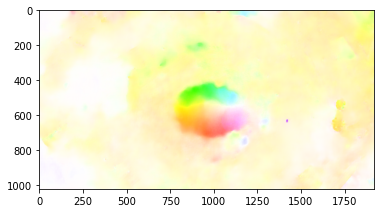

In [141]:
show_flow('./Flo/000001.flo')

### Save Flo files as images

In [142]:
import os
import PIL.Image
def mkdir_ifnotexists(dir):
    if os.path.exists(dir):
        return
    os.mkdir(dir)


# flo_pth='/content/flownet2pytorch/output/inference/run.epoch-0-flow-field/'
flo_pth = './Flo/'
flos=[flo_pth + f for f in os.listdir(flo_pth)]
mkdir_ifnotexists('./FlowFrames')
length = len(flos)
for i in range(length):
  if flos[i][-3:] == "flo":
    print(i+1, "/", length)
    PIL.Image.fromarray(flow_to_image(read_flow(flos[i]))).save('./FlowFrames/'+os.path.basename(flos[i])+'.png')
    os.remove(flos[i])

1 / 565
2 / 565
3 / 565
4 / 565
5 / 565
6 / 565
7 / 565
8 / 565
9 / 565
10 / 565
11 / 565
12 / 565
13 / 565
14 / 565
15 / 565
16 / 565
17 / 565
18 / 565
19 / 565
20 / 565
21 / 565
22 / 565
23 / 565
24 / 565
25 / 565
26 / 565
27 / 565
28 / 565
29 / 565
30 / 565
31 / 565
32 / 565
33 / 565
34 / 565
35 / 565
36 / 565
37 / 565
38 / 565
39 / 565
40 / 565
41 / 565
42 / 565
43 / 565
44 / 565
45 / 565
46 / 565
47 / 565
48 / 565
49 / 565
50 / 565
51 / 565
52 / 565
53 / 565
54 / 565
55 / 565
56 / 565
57 / 565
58 / 565
59 / 565
60 / 565
61 / 565
62 / 565
63 / 565
64 / 565
65 / 565
66 / 565
67 / 565
68 / 565
69 / 565
70 / 565
71 / 565
72 / 565
73 / 565
74 / 565
75 / 565
76 / 565
77 / 565
78 / 565
79 / 565
80 / 565
81 / 565
82 / 565
83 / 565
84 / 565
85 / 565
86 / 565
87 / 565
88 / 565
89 / 565
90 / 565
91 / 565
92 / 565
93 / 565
94 / 565
95 / 565
96 / 565
97 / 565
98 / 565
99 / 565
100 / 565
101 / 565
102 / 565
103 / 565
104 / 565
105 / 565
106 / 565
107 / 565
108 / 565
109 / 565
110 / 565
111 / 56

In [143]:
!ls ./FlowFrames | wc -l # Use to recheck if number of frames is consistent and nothing went wrong.

565


### Generate video from Flo

In [144]:
os.system('ffmpeg -r 25 -i FlowFrames/%6d.flo.png -vcodec libx264 -b 10M -y FlowVideo.mp4')

print("My program took", time.time() - start_time, "to run")

My program took 1060.8330144882202 to run


In [145]:
from google.colab import files
files.download('FlowVideo.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
# from IPython.display import HTML
# from base64 import b64encode
# mp4 = open('FlowVideo.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)